Today we are going to visualize my life using Fitbit and Matplotlib. 

# What is Fitbit

[Fitbit](https://www.fitbit.com) is a fitness watch that tracks your sleep, heart rate, and activity.
Fitbit is able to track your steps, however, it is also able to detect multiple types of activity
like running, walking, "sport" and biking.

# What is Matplotlib

[Matplotlib](https://matplotlib.org/) is a python visualization library that enables you to create bar graphs, line graphs, distributions and many more things.
Being able to visualize your results is essential to any person working with data at any scale.
Although I like [GGplot](https://ggplot2.tidyverse.org/) in R more than Matplotlib, Matplotlib is still my go to graphing library for Python. 

# Getting Your Data

There are two main ways that you can get your Fitbit data:

- Fitbit API
- Data Archival Export


Since connecting to the API and setting up all the web hooks can be a pain, I'm just going to use the data export option because this is only for one person.
You can export your data here: [https://www.fitbit.com/settings/data/export](https://www.fitbit.com/settings/data/export).

![Data export on fitbit's website](dataExport.png)

The Fitbit data archive was very organized and kept meticulous records of everything. 
All of the data was organized in separate JSON files labeled by date.
Fitbit keeps around 1MB of data on you per day; most of this data is from the heart rate sensors.
Although 1MB of data may sound like a ton of data, it is probably a lot less if you store it in formats other than JSON. 
When I downloaded the compressed file it was 20MB, but when I extracted it, it was 380MB!
I've only been using Fitbit for 11 months at this point. 

![compressed data](compression.png)

## Sleep

Sleep is something fun to visualize.
No matter how much of it you get you still feel tired as a college student.



In [1]:
import matplotlib.pyplot as plt
import pandas as pd

sleep_score_df = pd.read_csv('data/sleep/sleep_score.csv')

In [2]:
print(sleep_score_df)

     sleep_log_entry_id             timestamp  overall_score  \
0           26093459526  2020-02-27T06:04:30Z             80   
1           26081303207  2020-02-26T06:13:30Z             83   
2           26062481322  2020-02-25T06:00:30Z             82   
3           26045941555  2020-02-24T05:49:30Z             79   
4           26034268762  2020-02-23T08:35:30Z             75   
..                  ...                   ...            ...   
176         23696231032  2019-09-02T07:38:30Z             79   
177         23684345925  2019-09-01T07:15:30Z             84   
178         23673204871  2019-08-31T07:11:00Z             74   
179         23661278483  2019-08-30T06:34:00Z             73   
180         23646265400  2019-08-29T05:55:00Z             80   

     composition_score  revitalization_score  duration_score  \
0                   20                    19              41   
1                   22                    21              40   
2                   22                 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c2bcb6690>]],
      dtype=object)

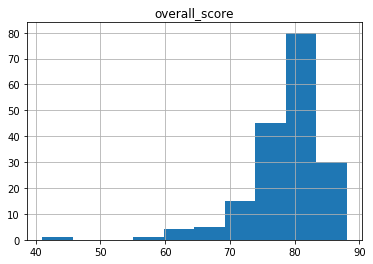

In [3]:
sleep_score_df.hist(column='overall_score')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c29ca4150>]],
      dtype=object)

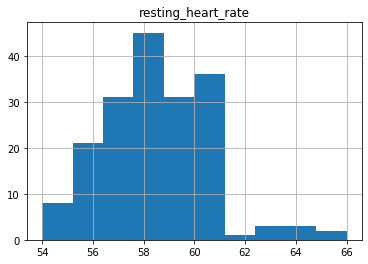

In [4]:
sleep_score_df.hist(column='resting_heart_rate')

## Heart Rate

Fitbit keeps their calculated heart rates in the sleep scores file rather than heart.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c27acc650>]],
      dtype=object)

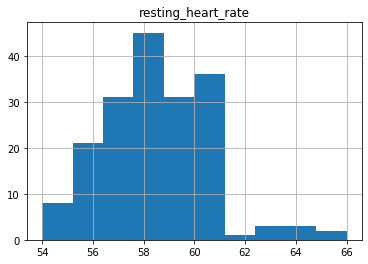

In [5]:
sleep_score_df.hist(column='resting_heart_rate')

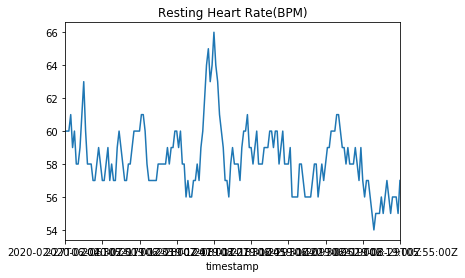

In [6]:
sleep_score_df.plot(kind='line', y='resting_heart_rate', x ='timestamp', legend=False, title="Resting Heart Rate(BPM)")

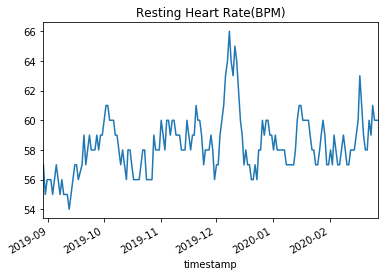

In [7]:
sleep_score_df = pd.read_csv('data/sleep/sleep_score.csv', parse_dates=[1])
sleep_score_df.plot(kind='line', y='resting_heart_rate', x ='timestamp', legend=False, title="Resting Heart Rate(BPM)")

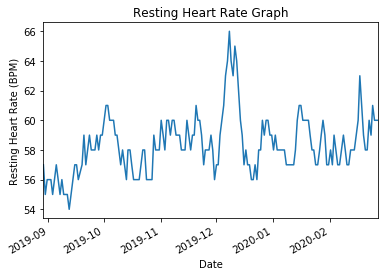

In [8]:
ax = plt.gca()
sleep_score_df.plot(kind='line', y='resting_heart_rate', x ='timestamp', legend=False, title="Resting Heart Rate Graph", ax=ax)
plt.xlabel("Date")
plt.ylabel("Resting Heart Rate (BPM)")
plt.show()

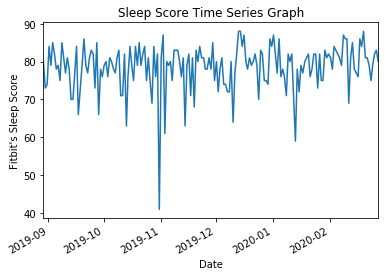

In [9]:
ax = plt.gca()
sleep_score_df.plot(kind='line', y='overall_score', x ='timestamp', legend=False, title="Sleep Score Time Series Graph", ax=ax)
plt.xlabel("Date")
plt.ylabel("Fitbit's Sleep Score")
plt.show()

In [10]:
temp = pd.DatetimeIndex(sleep_score_df['timestamp'])
sleep_score_df['weekday'] = temp.weekday

print(sleep_score_df)

     sleep_log_entry_id                 timestamp  overall_score  \
0           26093459526 2020-02-27 06:04:30+00:00             80   
1           26081303207 2020-02-26 06:13:30+00:00             83   
2           26062481322 2020-02-25 06:00:30+00:00             82   
3           26045941555 2020-02-24 05:49:30+00:00             79   
4           26034268762 2020-02-23 08:35:30+00:00             75   
..                  ...                       ...            ...   
176         23696231032 2019-09-02 07:38:30+00:00             79   
177         23684345925 2019-09-01 07:15:30+00:00             84   
178         23673204871 2019-08-31 07:11:00+00:00             74   
179         23661278483 2019-08-30 06:34:00+00:00             73   
180         23646265400 2019-08-29 05:55:00+00:00             80   

     composition_score  revitalization_score  duration_score  \
0                   20                    19              41   
1                   22                    21           

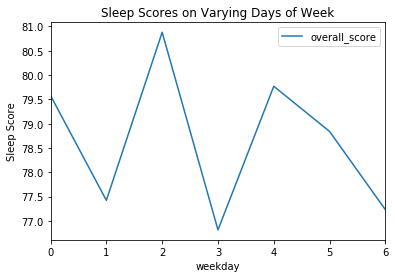

In [11]:
ax = plt.gca()
sleep_score_df.groupby('weekday').mean().plot(kind='line', y='overall_score', ax = ax)
plt.ylabel("Sleep Score")
plt.title("Sleep Scores on Varying Days of Week")
plt.show()

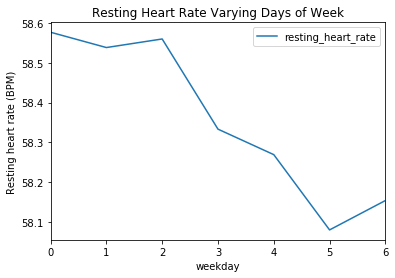

In [12]:
ax = plt.gca()
sleep_score_df.groupby('weekday').mean().plot(kind='line', y='resting_heart_rate', ax = ax)
plt.ylabel("Resting heart rate (BPM)")
plt.title("Resting Heart Rate Varying Days of Week")
plt.show()

## Calories

In [13]:
calories_df = pd.read_json("data/calories/calories-2019-07-01.json",  convert_dates=True)

In [14]:
print(calories_df)

                 dateTime  value
0     2019-07-01 00:00:00   1.07
1     2019-07-01 00:01:00   1.07
2     2019-07-01 00:02:00   1.07
3     2019-07-01 00:03:00   1.07
4     2019-07-01 00:04:00   1.07
...                   ...    ...
43195 2019-07-30 23:55:00   1.07
43196 2019-07-30 23:56:00   1.07
43197 2019-07-30 23:57:00   1.07
43198 2019-07-30 23:58:00   1.07
43199 2019-07-30 23:59:00   1.07

[43200 rows x 2 columns]


In [15]:
import datetime
calories_df['date_minus_time'] = calories_df["dateTime"].apply( lambda calories_df : 
    datetime.datetime(year=calories_df.year, month=calories_df.month, day=calories_df.day))	
calories_df.set_index(calories_df["date_minus_time"],inplace=True)

print(calories_df)

                           dateTime  value date_minus_time
date_minus_time                                           
2019-07-01      2019-07-01 00:00:00   1.07      2019-07-01
2019-07-01      2019-07-01 00:01:00   1.07      2019-07-01
2019-07-01      2019-07-01 00:02:00   1.07      2019-07-01
2019-07-01      2019-07-01 00:03:00   1.07      2019-07-01
2019-07-01      2019-07-01 00:04:00   1.07      2019-07-01
...                             ...    ...             ...
2019-07-30      2019-07-30 23:55:00   1.07      2019-07-30
2019-07-30      2019-07-30 23:56:00   1.07      2019-07-30
2019-07-30      2019-07-30 23:57:00   1.07      2019-07-30
2019-07-30      2019-07-30 23:58:00   1.07      2019-07-30
2019-07-30      2019-07-30 23:59:00   1.07      2019-07-30

[43200 rows x 3 columns]


In [16]:
calories_per_day = calories_df.resample('D').sum()
print(calories_per_day)

                   value
date_minus_time         
2019-07-01       3422.68
2019-07-02       2705.85
2019-07-03       2871.73
2019-07-04       4089.93
2019-07-05       3917.91
2019-07-06       2762.55
2019-07-07       2929.58
2019-07-08       2698.99
2019-07-09       2833.27
2019-07-10       2529.21
2019-07-11       2634.25
2019-07-12       2953.91
2019-07-13       4247.45
2019-07-14       2998.35
2019-07-15       2846.18
2019-07-16       3084.39
2019-07-17       2331.06
2019-07-18       2849.20
2019-07-19       2071.63
2019-07-20       2746.25
2019-07-21       2562.11
2019-07-22       1892.99
2019-07-23       2372.89
2019-07-24       2320.42
2019-07-25       2140.87
2019-07-26       2430.38
2019-07-27       3769.04
2019-07-28       2036.24
2019-07-29       2814.87
2019-07-30       2077.82


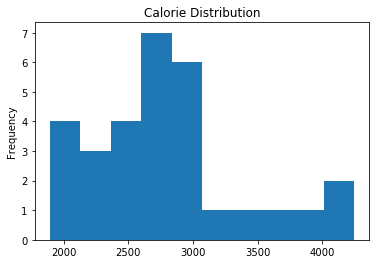

In [17]:
ax = plt.gca()
calories_per_day.plot(kind='hist', title="Calorie Distribution", legend=False, ax=ax)
plt.show()

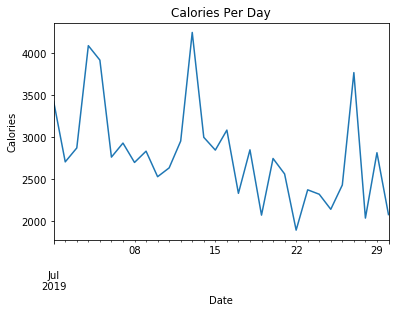

In [18]:
ax = plt.gca()
calories_per_day.plot(kind='line', y='value', legend=False, title="Calories Per Day", ax=ax)
plt.xlabel("Date")
plt.ylabel("Calories")
plt.show()

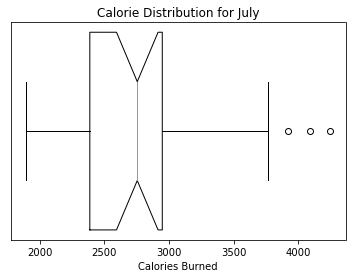

In [27]:
ax = plt.gca()
ax.set_title('Calorie Distribution for July')
ax.boxplot(calories_per_day['value'], vert=False,manage_ticks=False, notch=True)
plt.xlabel("Calories Burned")
ax.set_yticks([])
plt.show()